In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import geopandas as gpd
import matplotlib.pyplot as plt



## Sub-question 4: Does the covid affects the transportation modes? 
## --- A comparison between a wealthier and less wealthy country. 

This sub-question hels answers the main question because the change of the transportation modes is a good indicator of the influence of the covid on mobility. To answer this sub-question, 

### 4.1 Determines two periods representing pre-pandemic and pandemic
- Firstly, visualize the covid daily new cases data of the Netherlands and Poland in a line chart.
- Secondly, add some rectangular to show some interesting time points.

In [3]:
# import processed data
file_path = '/Users/chenghuayang/Desktop/Q1/Python/TIL6010-Project/processed-data-4/CovidData.csv'
covid_df = pd.read_csv(file_path, delimiter=',')

# visualize the imported data
fig = px.line(covid_df, x='date', y='new_cases', color='location', title='Daily new cases since Feb 2020')

# mark typical pre-pandemic period
fig.add_vrect(x0="2020-04-09", x1="2020-08-25", col=1,
              annotation_text="Pre-pandemic", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)

# mark typical pandemic shock 1
fig.add_vrect(x0="2020-10-26", x1="2020-11-23", col=1,
              annotation_text="Pandemic 1", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

# mark typical pandemic shock 1
fig.add_vrect(x0="2021-03-04", x1="2021-04-21", col=1,
              annotation_text="Pandemic 2", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

# mark typical pandemic shock 2
fig.add_vrect(x0="2022-01-03", x1="2022-02-25", col=1,
              annotation_text="Pandemic 2", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)

- As is shown in the picture, most part of the year 2020 is pre-pandemic period, where there is no obvious growth in covid cases. 

### 4.2 Transportation modes in the year of 2020 and 2021 in the Netherlands and Poland

In [4]:
# import processed Netherlands transportation data
file_path = '/Users/chenghuayang/Desktop/Q1/Python/TIL6010-Project/processed-data-4/TransModes-NL.csv'
TransModes_NL = pd.read_csv(file_path, delimiter=',')
TransModes_NL =  TransModes_NL.reset_index(drop = True)
TransModes_NL

,Unnamed: 0,Travel Modes,Trip Characteristics,Region,Year,Average Trip Per Day,Average Trip Per Year
0,0,Total,Sunday,The Netherlands,2018,2.06,107.0
1,1,Total,Sunday,The Netherlands,2019,1.94,101.0
2,2,Total,Sunday,The Netherlands,2020,1.64,85.0
3,3,Total,Sunday,The Netherlands,2021,1.83,95.0
4,4,Total,Sunday,Noord-Nederland (LD),2018,1.97,103.0
...,...,...,...,...,...,...,...
31003,31003,Other,Trip in December,Noord-Brabant (PV),2021,NaN,NaN
31004,31004,Other,Trip in December,Limburg (PV),2018,NaN,NaN
31005,31005,Other,Trip in December,Limburg (PV),2019,NaN,NaN
31006,31006,Other,Trip in December,Limburg (PV),2020,NaN,NaN


- Categorize the Netherlands transportation modes data

In [5]:

def cal_percentage(dfTrans, string):
       ''' 
       Assume input is a dataframe and a year string,
       return a list contains percentage of each catagorized transportation mode in the given year.
       '''
       # extract rows of the netherlands nation level
       df = dfTrans[dfTrans['Region'] == 'The Netherlands']

       # drop unwanted transportation modes
       df = df[(df['Travel Modes'] != 'Total') & (df['Travel Modes'] != 'Passenger car (driver)') 
       & (df['Travel Modes'] != 'Walking')]

       # extract rows catagorized by week notation
       df = df[df['Trip Characteristics'].isin(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday'])]

       # extract given year
       if string == '2018':
              df = df.query('Year==2018')
       elif string == '2019':
              df = df.query('Year==2019')
       elif string == '2020':
              df = df.query('Year==2020')
       elif string == '2021':
              df = df.query('Year==2021')       
       else:
              print('Invalid Year! Please Re-enter')

       # rearrange dataframe
       df = df.drop_duplicates(subset=['Travel Modes', 'Trip Characteristics'], keep='first')
       df = df.groupby('Travel Modes').sum()
       df.loc['Railway transport'] = df.loc[['Bus/metro', 'Train']].sum(axis=0)
       df = df.drop(df.index[[1,4]])
       df = df.rename({'Passenger car (passenger)':'Road transport'}, axis=0)

       # calculate percentage and do formatting
       df['Percentage'] = (df['Average Trip Per Day']/df['Average Trip Per Day'].sum())*100
       df['Percentage'] = df['Percentage'].map('{:,.2f}'.format)

       return df['Percentage']

# create a new datafrmae
mode_Nl = pd.DataFrame() 

# call defiened function
mode_Nl['Percentage_2018'] = cal_percentage(TransModes_NL, '2018')
mode_Nl['Percentage_2019'] = cal_percentage(TransModes_NL, '2019')  
mode_Nl['Percentage_2020'] = cal_percentage(TransModes_NL, '2020')
mode_Nl['Percentage_2021'] = cal_percentage(TransModes_NL, '2021')

# display the dataframe
mode_Nl.head(5)


,Percentage_2018,Percentage_2019,Percentage_2020,Percentage_2021
Travel Modes,,,,
Bike,57.32,56.68,61.14,59.47
Other,7.84,8.45,8.91,9.73
Road transport,23.40,23.42,23.26,24.13
Railway transport,11.44,11.44,6.69,6.67


In [6]:
file_path = '/Users/chenghuayang/Desktop/Q1/Python/TIL6010-Project/processed-data-4/TransModes-PL.csv'
transModes_Pl = pd.read_csv(file_path, delimiter=',')
transModes_Pl.set_index('Travel Modes', inplace=True)
transModes_Pl.loc['Other'] = transModes_Pl.loc[['Air transport', 'Inland waterway transport', 'Maritime transport']].sum(axis=0)
transModes_Pl = transModes_Pl.drop(transModes_Pl.index[[0, 3, 4, 5]]) 
transModes_Pl = transModes_Pl.drop(['Region'],axis=1)
transModes_Pl.loc['Bike'] = 0
transModes_Pl.index

Index(['Railway transport', 'Road transport  ', 'Other', 'Bike'], dtype='object', name='Travel Modes')

In [7]:

mode_percentage = pd.concat([
       mode_Nl['Percentage_2018'], 
       mode_Nl['Percentage_2019'], 
       mode_Nl['Percentage_2020'], 
       mode_Nl['Percentage_2021'],
       transModes_Pl['percentage_2018'], 
       transModes_Pl['percentage_2019'], 
       transModes_Pl['percentage_2020'], 
       transModes_Pl['percentage_2021']
])

mode_percentage = pd.DataFrame(data = mode_percentage)
mode_percentage['Percentage'] = mode_percentage.iloc[:, 0]
mode_percentage = mode_percentage.drop(columns = mode_percentage.columns[0])

mode_percentage['Year'] = (['2018'] * 4 + ['2019'] * 4 + ['2020'] * 4 + ['2021'] * 4) * 2
mode_percentage['Country'] = ['The Netherlands'] * 16 + ['Poland'] * 16

mode_percentage = mode_percentage.reset_index()
mode_percentage.head(5)

,Travel Modes,Percentage,Year,Country
0,Bike,57.32,2018,The Netherlands
1,Other,7.84,2018,The Netherlands
2,Road transport,23.40,2018,The Netherlands
3,Railway transport,11.44,2018,The Netherlands
4,Bike,56.68,2019,The Netherlands


In [8]:

fig = px.bar(mode_percentage, x='Travel Modes', y='Percentage', animation_frame='Year', animation_group='Country',
            color='Travel Modes', text='Country', range_y=[0,100])
fig.update_layout(xaxis={'categoryorder':'total ascending'}, title_text="Transportation Modes in the Netherlands and Poland")
fig.show()

In [9]:

df1 = mode_percentage[
    (mode_percentage['Year'] == '2020') &
    (mode_percentage['Country'] == 'The Netherlands')]

df2 = mode_percentage[
    (mode_percentage['Year'] == '2021') &
    (mode_percentage['Country'] == 'The Netherlands')]

df3 = mode_percentage[
    (mode_percentage['Year'] == '2020') &
    (mode_percentage['Country'] == 'Poland')]

df4 = mode_percentage[
    (mode_percentage['Year'] == '2021') &
    (mode_percentage['Country'] == 'Poland')]

fig = make_subplots(rows=2, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"},{"type": "pie"}]])

fig.add_trace(go.Pie(
     values = df1['Percentage'],
     labels = df1['Travel Modes'],
     domain = dict(x=[0, 0.5], y=[0, 0.5]),
     title = "The Netherlands Transport modes in 2020"), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values = df2['Percentage'],
     labels = df2['Travel Modes'],
     domain = dict(x=[0.5, 1], y=[0, 0.5]),
     title = "The Netherlands Transport modes in 2021"), 
     row=1, col=2)

fig.add_trace(go.Pie(
     values = df3['Percentage'],
     labels = df3['Travel Modes'],
     domain = dict(x=[0, 0.5], y=[0.5, 1]),
     title = "Poland Transport modes in 2020"), 
     row=2, col=1)

fig.add_trace(go.Pie(
     values = df4['Percentage'],
     labels = df4['Travel Modes'],
     domain = dict(x=[0.5, 1], y=[0.5, 1]),
     title = "Poland Transport modes in 2021"), 
     row=2, col=2)

fig.update_layout(height=700, width=900, title_text="Transportation Modes in the Netherlands and Poland in 2020 and 2021")
fig.show()


In [10]:
bikeNl = TransModes_NL[TransModes_NL['Travel Modes']=='Bike']
bikeNl = bikeNl[bikeNl['Region'].str.contains('(LD)') == False]
bikeNl = bikeNl[bikeNl['Region'].str.contains('The Netherlands') == False]
bikeNl['Region'] = bikeNl['Region'].str.replace('[ (PV)]', '')
bikeNl['Region'] = bikeNl['Region'].replace(['Fryslân'],'Friesland')

bike_2020 = bikeNl[(bikeNl['Trip Characteristics']=='Trip in June') & (bikeNl['Year']==2020)]
bike_2020 = bike_2020.drop_duplicates(subset=['Region'])

mean_value = bike_2020['Average Trip Per Year'].mean()

bike_2020['Average Bike Trips in 2020'] = bike_2020['Average Trip Per Year']
bike_2020['Average Bike Trips in 2020'].fillna(value=mean_value, inplace=True)
bike_2020 = bike_2020.loc[:, ['Region', 'Average Bike Trips in 2020']]
bike_2020 = bike_2020.reset_index(drop=True)

#

bike_2021 = bikeNl[(bikeNl['Trip Characteristics']=='Trip in June') & (bikeNl['Year']==2021)]
bike_2021 = bike_2021.drop_duplicates(subset=['Region'])

mean_value = bike_2021['Average Trip Per Year'].mean()

bike_2021['Average Bike Trips in 2021'] = bike_2021['Average Trip Per Year']
bike_2021['Average Bike Trips in 2021'].fillna(value=mean_value, inplace=True)
bike_2021 = bike_2021.loc[:, ['Region', 'Average Bike Trips in 2021']]
bike_2021 = bike_2021.reset_index(drop=True)
bike_2021

/var/folders/rv/_wk364rj6zx3dwtsg07t65h00000gn/T/ipykernel_21616/1916769471.py:2: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

/var/folders/rv/_wk364rj6zx3dwtsg07t65h00000gn/T/ipykernel_21616/1916769471.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,Region,Average Bike Trips in 2021
0,Groningen,26.142857
1,Friesland,26.142857
2,Drenthe,26.142857
3,Overijssel,31.000000
4,Flevoland,26.142857
5,Gelderland,27.000000
6,Utrecht,31.000000
7,Noord-Holland,28.000000
8,Zuid-Holland,25.000000
9,Zeeland,26.142857


In [12]:
df_map = gpd.read_file('/Users/chenghuayang/Downloads/stanford-st293bj4601-geojson.json')
df_map = df_map[df_map['type_1'].str.contains('Water body') == False]
df_map = df_map.rename(columns={'name_1':'Region'})
df_map = df_map.reset_index(drop=True)

map_bike = pd.merge(df_map, bike_2020, on='Region')
map_bike = pd.merge(map_bike, bike_2021, on='Region')
map_bike.head(5)

,id,id_0,iso,name_0,id_1,Region,hasc_1,ccn_1,cca_1,type_1,engtype_1,nl_name_1,varname_1,geometry,Average Bike Trips in 2020,Average Bike Trips in 2021
0,st293bj4601.1,158,NLD,Netherlands,1,Drenthe,NL.DR,0,None,Provincie,Province,None,None,"MULTIPOLYGON (((6.50131 53.19841, 6.50429 53.1...",23.125,26.142857
1,st293bj4601.10,158,NLD,Netherlands,10,Overijssel,NL.OV,0,None,Provincie,Province,None,None,"MULTIPOLYGON (((6.13809 52.84380, 6.15725 52.8...",24.000,31.000000
2,st293bj4601.2,158,NLD,Netherlands,2,Flevoland,NL.FL,0,None,Provincie,Province,None,None,"MULTIPOLYGON (((5.44521 52.55581, 5.43211 52.5...",23.125,26.142857
3,st293bj4601.3,158,NLD,Netherlands,3,Friesland,NL.FR,0,None,Provincie,Province,None,Frise|Frisia|Frísia,"MULTIPOLYGON (((5.24917 53.25458, 5.24917 53.2...",23.125,26.142857
4,st293bj4601.4,158,NLD,Netherlands,4,Gelderland,NL.GE,0,None,Provincie,Province,None,Geldern|Gheldria|Guelders|Gueldre,"MULTIPOLYGON (((5.92733 52.48264, 5.93285 52.4...",28.000,27.000000


<AxesSubplot:title={'center':'Average bike trips in 2021'}>

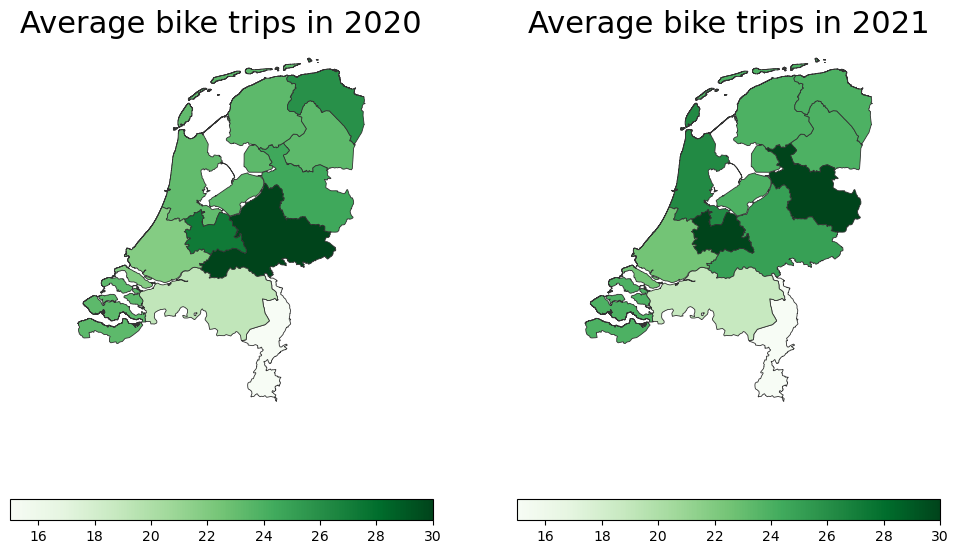

In [13]:

fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(nrows=1, ncols=2)

ax1 = fig.add_subplot(gs[0,0])
ax1.axis('off')
ax1.set_title(
    'Average bike trips in 2020', 
    fontdict={'fontsize': '22', 'fontweight': '3'})

fig.colorbar(plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=15, vmax=30)), orientation="horizontal")
map_bike.plot(column="Average Bike Trips in 2020", cmap='Greens', linewidth=0.6, ax=ax1, edgecolor='0.2')

ax2 = fig.add_subplot(gs[0,1])
ax2.axis('off')
ax2.set_title(
    'Average bike trips in 2021', 
    fontdict={'fontsize': '22', 'fontweight': '3'})
fig.colorbar(plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=15, vmax=30)), orientation="horizontal")
map_bike.plot(column="Average Bike Trips in 2021", cmap='Greens', linewidth=0.6, ax=ax2, edgecolor='0.2')

